# Gender Classification

Dataset Used is -
https://talhassner.github.io/home/projects/Adience/Adience-data.html#frontalized

In [ ]:
import os

In [ ]:
path_faces = './aligned'

In [ ]:
image_folder_dict = {}
for folder in os.listdir(path_faces):
    image_files = []
    if folder[-4:] != '.txt':
        for files in os.listdir(path_faces + '/' + folder):
            if files[-4:] == '.jpg':
                  image_files.append(files)
        image_folder_dict[f'{folder}'] = image_files

In [ ]:
import pandas as pd

In [ ]:
def load_fold_data():
    fold_0_path = './aligned/fold_0_data.txt'
    fold_1_path = './aligned/fold_1_data.txt'
    fold_2_path = './aligned/fold_2_data.txt'
    fold_3_path = './aligned/fold_3_data.txt'
    fold_4_path = './aligned/fold_4_data.txt'

    fold_0_df = pd.read_csv(fold_0_path, sep='\t')
    fold_1_df = pd.read_csv(fold_1_path, sep='\t')
    fold_2_df = pd.read_csv(fold_2_path, sep='\t')
    fold_3_df = pd.read_csv(fold_3_path, sep='\t')
    fold_4_df = pd.read_csv(fold_4_path, sep='\t')

    full_fold_df = fold_0_df.append(fold_1_df)
    full_fold_df = full_fold_df.append(fold_2_df)
    full_fold_df = full_fold_df.append(fold_3_df)
    full_fold_df = full_fold_df.append(fold_4_df)

    return full_fold_df

In [ ]:
full_fold_df = load_fold_data()

C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\3076234044.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_fold_df = fold_0_df.append(fold_1_df)
C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\3076234044.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_fold_df = full_fold_df.append(fold_2_df)
C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\3076234044.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_fold_df = full_fold_df.append(fold_3_df)
C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\3076234044.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_fold_df = full_fold_df.append(fold_4

In [ ]:
full_fold_df.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [ ]:
full_fold_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19370 entries, 0 to 3815
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.9+ MB


In [ ]:
full_fold_df = full_fold_df.reset_index(drop=True)
print(full_fold_df.gender.unique())

['f' 'm' nan 'u']


In [ ]:
# There are certain ages which lies in between the bins,
# so we are removing them to avoid confusion
print(full_fold_df.age.unique())

['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']


In [ ]:
# as you can see there are two bins which is not in
# offical bins so we have to remove than also
# Offical bins = (0-2, 4-6, 8-13, 15-20, 25-32, 38-43, 48-53, 60-)
# unwanted bins = (8-23) (38, 48) as we cannot include inside any other bins
# (27-32) (38, 42) bins can be included in the (25-32), (38-43) class

In [ ]:
def remove_unwanted_data(full_fold_df):
    # removing nan and 'u' values from the gender
    index_df = full_fold_df[full_fold_df.gender.isna()].index
    full_fold_df.drop(index_df, inplace=True)
    index_df = full_fold_df[full_fold_df.gender == 'u'].index
    full_fold_df.drop(index_df, inplace=True)

    full_fold_df = full_fold_df[full_fold_df['age'].str.contains('\)')]

    full_fold_df = full_fold_df[~full_fold_df['age'].str.contains('(8, 23)')]

    full_fold_df = full_fold_df[~full_fold_df['age'].str.contains('(38, 48)')]

    full_fold_df = full_fold_df.drop_duplicates(subset=['user_id', 'original_image'])

    return full_fold_df

In [ ]:
full_fold_df = remove_unwanted_data(full_fold_df)
final_df = full_fold_df[['user_id', 'original_image', 'face_id', 'age', 'gender']]

C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\1111526256.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  full_fold_df = full_fold_df[~full_fold_df['age'].str.contains('(8, 23)')]
C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\1111526256.py:12: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  full_fold_df = full_fold_df[~full_fold_df['age'].str.contains('(38, 48)')]


In [ ]:
class_dict = {
    'm':0,
    'f':1
}

In [ ]:
classes = []
for i in final_df.index:
    gender = final_df.loc[i, 'gender']
    classes.append(class_dict[gender])

len(classes)

10870

In [ ]:
final_df['class'] = classes

C:\Users\Pranav S\AppData\Local\Temp\ipykernel_11036\2462118974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['class'] = classes


In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
img_path = []
base_path = './aligned/'
for idx in final_df.index:
  file_name = final_df.loc[idx,'original_image']
  folder_names = image_folder_dict[final_df.loc[idx,'user_id']]
  face_id = str(final_df.loc[idx,'face_id'])
  for i in folder_names:
    path = base_path + final_df.loc[idx,'user_id'] + '/' + i
    if path.endswith(face_id+'.'+file_name):
      img_path.append(path)

In [ ]:
final_df['path'] = img_path

In [ ]:
import tensorflow as tf

sess = tf.compat.v1.Session()

In [ ]:
import numpy as np
import cv2
import random
from sklearn.decomposition import PCA

In [ ]:
# Seperating the X and Y
y = final_df['class'].values
X = np.empty((10870, 199, 199, 3), dtype=np.uint8)
for idx,i in enumerate(final_df.path):
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cv2.resize(img,(199, 199))
    img = img.reshape(199, 199, 3)
    X[idx,:] = img

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# for memory management run after train_test_split to
# save memory
del X
del y

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
def build_model_cnn(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3,
                                   strides=1,padding='same',activation='relu',
                                   input_shape = input_shape)),

    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)),

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                   strides=1,padding='same',activation='relu')),

    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)),

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3,
                                   strides=1,padding='same',activation='relu')),

    #model.add(tf.keras.layers.BatchNormalization(axis=-1)),

    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)),

    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3,
                                   strides=1,padding='same',activation='relu')),

    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3,
                                   strides=1,padding='same',activation='relu')),
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)),

    model.add(tf.keras.layers.Flatten()),
    model.add(tf.keras.layers.Dropout(0.8))
    model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

    opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,
                loss='CategoricalCrossentropy',
                metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
gender_model = build_model_cnn(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 64)       0

In [ ]:
tf.debugging.set_log_device_placement(True)
stop_early = tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss', patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
                        'gender_model.h5',
                        verbose=1,
                        save_best_only=True,
                        monitor='val_loss')

history = gender_model.fit(x=X_train,y= y_train,
              validation_data=(X_test, y_test),
              epochs=50,
              callbacks=[stop_early, checkpoint])

Epoch 1/50
272/272 [==============================] - ETA: 0s - loss: 1.0487 - accuracy: 0.5948
Epoch 1: val_loss improved from inf to 0.60125, saving model to gender_model.h5
272/272 [==============================] - 17s 51ms/step - loss: 1.0487 - accuracy: 0.5948 - val_loss: 0.6013 - val_accuracy: 0.6716
Epoch 2/50
271/272 [============================>.] - ETA: 0s - loss: 0.6284 - accuracy: 0.6499
Epoch 2: val_loss improved from 0.60125 to 0.58531, saving model to gender_model.h5
272/272 [==============================] - 13s 46ms/step - loss: 0.6281 - accuracy: 0.6501 - val_loss: 0.5853 - val_accuracy: 0.6868
Epoch 3/50
271/272 [============================>.] - ETA: 0s - loss: 0.5955 - accuracy: 0.6780
Epoch 3: val_loss improved from 0.58531 to 0.57291, saving model to gender_model.h5
272/272 [==============================] - 13s 47ms/step - loss: 0.5958 - accuracy: 0.6780 - val_loss: 0.5729 - val_accuracy: 0.7111
Epoch 4/50
271/272 [============================>.] - ETA: 0s - l

In [ ]:
import matplotlib.pyplot as plt

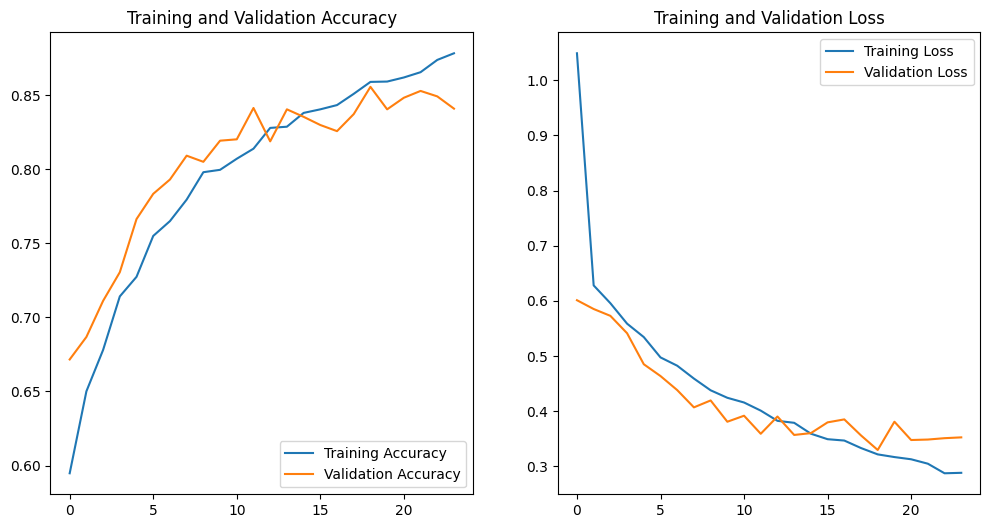

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(f'the Accuracy of the model is {max(val_acc)}')

the Accuracy of the model is 0.8555657863616943


In [ ]:
# for Memory Managment
del gender_model

In [ ]:
tf.compat.v1.reset_default_graph()